# Filament Decorrelation Analysis
Analysis of various decorellation parameters.

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures'


dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', 're', 'enum', 

## Load a filament simulation


In [67]:

# root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.6794871794871793_activityTime_750_simType_point'
# file = 'SimResults_00.hdf5'

# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/SimResults_00.hdf5'
# folder, *rest = os.path.split(os.path.join(root_folder, track_folder, file))

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.6794871794871793_activityTime_750_simType_point/SimResults_00.hdf5'

# Aperiodic dynamics
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.6842105263157894_activityTime_750_simType_point/SimResults_00.hdf5'


# Aperiodic to Periodic transition (Transient Chaos?)
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.615384615384615_activityTime_750_simType_point/SimResults_00.hdf5'


# Period 2
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point/SimResults_00.hdf5'

# period 2
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141025641025641_activityTime_750_simType_point/SimResults_00.hdf5'

# Period 4
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.3589743589743586_activityTime_750_simType_point/SimResults_00.hdf5'
# Period 6
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5897435897435896_activityTime_750_simType_point/SimResults_00.hdf5'

# Period 10
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.3974358974358974_activityTime_750_simType_point/SimResults_00.hdf5'
# Aperiodic (smallest activity strength)
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0769230769230769_activityTime_750_simType_point/SimResults_00.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782051282051282_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.0384615384615383_activityTime_750_simType_point/SimResults_02.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-10-19/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.7435897435897436_activityTime_750_simType_point/SimResults_03.hdf5'
filament = analysis.analysisTools(file = file)

file_path = filament.analysisFolder

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141025641025641_activityTime_750_simType_point
Data file SimResults_00.hdf5


In [68]:
# Find start and end indices corresponding to compressive and extensional phases of activity
phase_value_compression = 0

# Phase indices at start of compression
delta_phase = 2*np.pi*np.mean(filament.Time[1:] - filament.Time[:-1])/filament.activity_timescale # Smallest change in phase

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value_compression)
constant_phase_mask = abs_val_array <= 0.5*delta_phase

time_points = np.array(range(0, filament.Nt))
constant_phase_compression = time_points[constant_phase_mask]

# Phase indices at start of extension
phase_value_extension = np.pi

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value_extension)

min_phase = np.min(abs_val_array)
constant_phase_mask = abs_val_array <= min_phase
constant_phase_extension = np.array(time_points[constant_phase_mask])

# Keep only indices separated by more than 1

temp_array = []

for ii in range(len(constant_phase_extension)):
    
    if(ii == len(constant_phase_extension)-1):
        temp_array.append(constant_phase_extension[ii])
        
    elif(constant_phase_extension[ii+1] - constant_phase_extension[ii] > 1):
        temp_array.append(constant_phase_extension[ii])
        
    
    
constant_phase_extension = np.array(temp_array)
        
    
# Find total number of activity cycles
filament.activity_cycles = int(filament.Time[-1]/filament.activity_timescale)

print(filament.activity_cycles)

500


In [69]:
# Store tuples containing (Start, End) indices for compression phase and extension phase

start_end_compression = np.empty((2, filament.activity_cycles), dtype = int)
start_end_extension = np.empty((2, filament.activity_cycles), dtype = int)


In [70]:
for ii in range(filament.activity_cycles):
    
    start_end_compression[:,ii] = constant_phase_compression[ii], constant_phase_extension[ii]
    start_end_extension[:,ii] = constant_phase_extension[ii], constant_phase_compression[ii+1]
    
    assert(start_end_compression[1,ii]-start_end_compression[0,ii] >0)
    assert(start_end_extension[1,ii]-start_end_extension[0,ii] >0)
    
    

In [71]:
# Calculate the filament tip orientations for all times
filament.compute_tip_angle()
filament.compute_base_tip_angle()

In [145]:
# Find the minimum time intervals over all compression and extensional phases (for use as a common time interval for interpolation)
T_min_comp = filament.Time[-1]
T_min_ext = filament.Time[-1]

for ii in range(filament.activity_cycles):
    
    comp_start_index = start_end_compression[0, ii]
    comp_end_index = start_end_compression[1, ii]
    
    ext_start_index = start_end_extension[0, ii]
    ext_end_index = start_end_extension[1, ii]
    
#     print(filament.Time[comp_end_index])
#     print(filament.Time[ext_end_index])
#     print(filament.Time[comp_end_index]-filament.Time[comp_start_index])
#     print(filament.Time[ext_end_index]-filament.Time[ext_start_index])

#     print(filament.Time[comp_start_index:comp_end_index]-filament.Time[comp_start_index])
#     print(filament.Time[ext_start_index:ext_end_index]-filament.Time[ext_start_index])
    
#     print(filament.Time[comp_end_index] - filament.Time[comp_start_index])
#     print(filament.Time[ext_end_index] - filament.Time[ext_start_index])
    # Take the min of the current value and the time interval duration during the current compressive phase
    T_min_comp = min(T_min_comp, filament.Time[comp_end_index] - filament.Time[comp_start_index])
    
    T_min_ext = min(T_min_ext, filament.Time[ext_end_index] - filament.Time[ext_start_index])



In [123]:
# Store tip angles on a uniform grid by interpolation (used for calculating the decorrelation function)
from scipy import interpolate

n_time = 500
filament.duty_cycle = 0.5
tip_angles_compression = np.empty((filament.activity_cycles, n_time), dtype = float)
tip_angles_extension = np.empty((filament.activity_cycles, n_time), dtype = float)

base_tip_angles_compression = np.empty((filament.activity_cycles, n_time), dtype = float)
base_tip_angles_extension = np.empty((filament.activity_cycles, n_time), dtype = float)

time_array_comp = np.linspace(0, T_min_comp, n_time)
time_array_ext = np.linspace(0, T_min_ext, n_time)

for ii in range(filament.activity_cycles):
    
    comp_start_index = start_end_compression[0, ii]
    comp_end_index = start_end_compression[1, ii]
    
    ext_start_index = start_end_extension[0, ii]
    ext_end_index = start_end_extension[1, ii]
    
    # Interpolate (Tip angle)
    compression_func = interpolate.interp1d(filament.Time[comp_start_index:comp_end_index+1]-filament.Time[comp_start_index], filament.derived_data['tip angle'][comp_start_index:comp_end_index+1])
    tip_angles_compression[ii, :] = compression_func(time_array_comp)
    
    extension_func = interpolate.interp1d(filament.Time[ext_start_index:ext_end_index+1]-filament.Time[ext_start_index], filament.derived_data['tip angle'][ext_start_index:ext_end_index+1])
    tip_angles_extension[ii, :] = extension_func(time_array_ext)
    
    # Interpolate (Base-Tip angle)
    compression_func = interpolate.interp1d(filament.Time[comp_start_index:comp_end_index+1]-filament.Time[comp_start_index], filament.derived_data['base tip angle'][comp_start_index:comp_end_index+1])
    base_tip_angles_compression[ii, :] = compression_func(time_array_comp)
    
    extension_func = interpolate.interp1d(filament.Time[ext_start_index:ext_end_index+1]-filament.Time[ext_start_index], filament.derived_data['base tip angle'][ext_start_index:ext_end_index+1])
    base_tip_angles_extension[ii, :] = extension_func(time_array_ext)
    

<IPython.core.display.Javascript object>


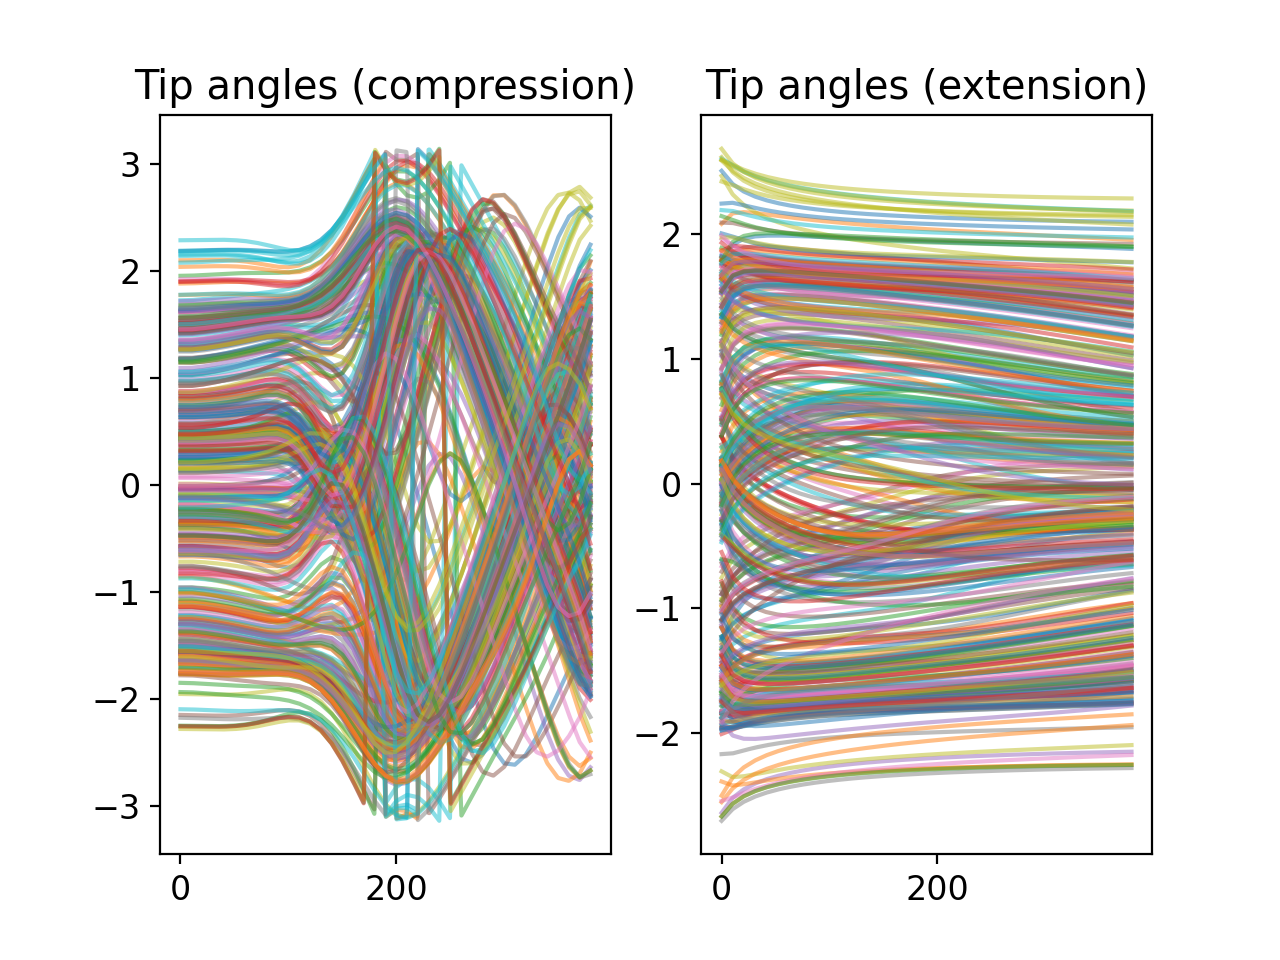

In [124]:
# Plot the tip angles during Compression and Extension

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2)
for ii in range(100, 500):
    
    ax0.plot(time_array_comp, tip_angles_compression[ii, :], alpha = 0.5)
    ax1.plot(time_array_comp, tip_angles_extension[ii, :], alpha = 0.5)

    

ax0.set_title('Tip angles (compression)')
ax1.set_title('Tip angles (extension)')

plt.show()



<IPython.core.display.Javascript object>


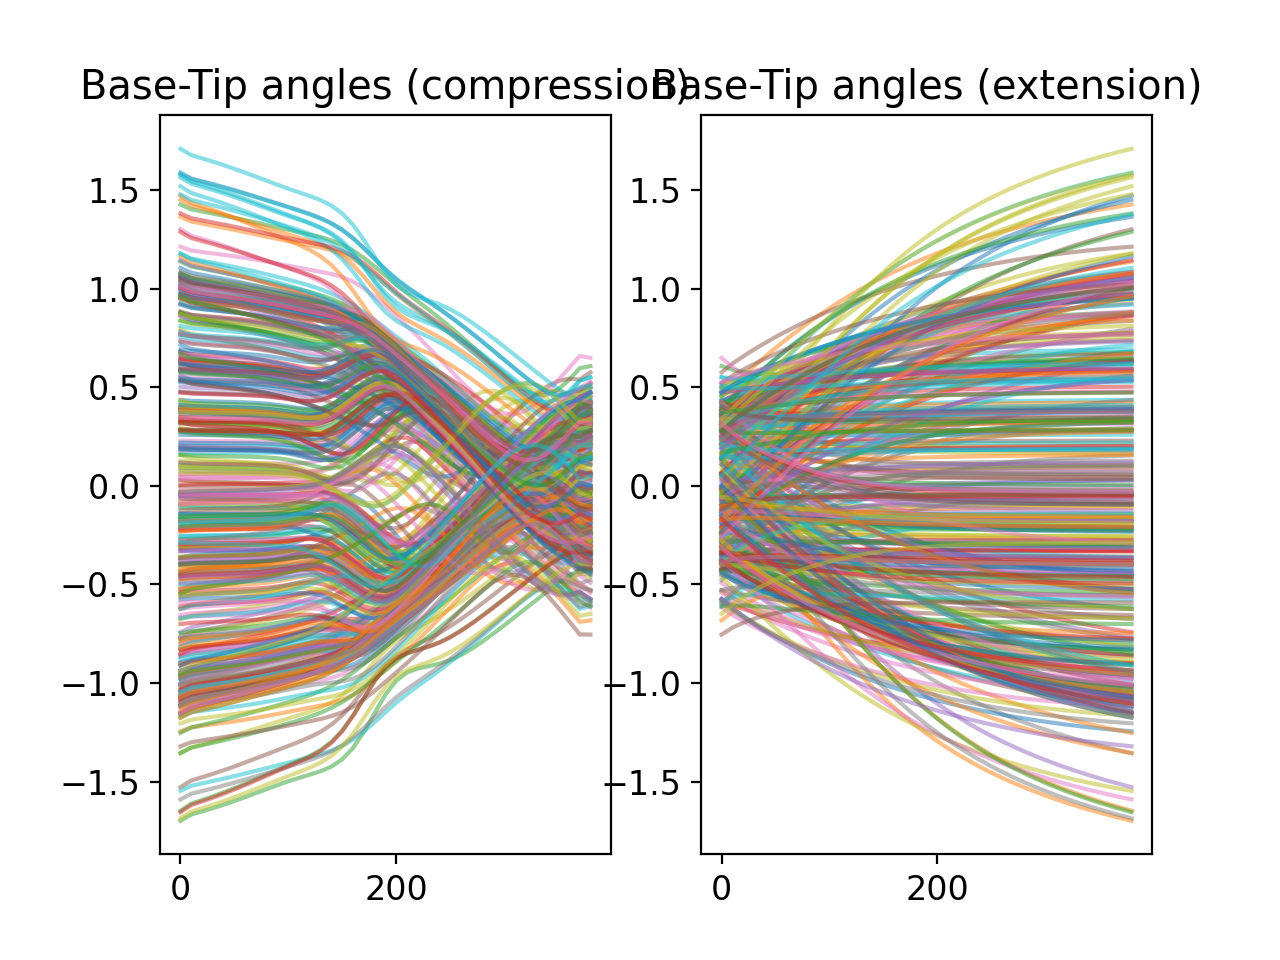

In [125]:
# Plot the base tip angles during Compression and Extension

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2)
for ii in range(100, 500):
    
    ax0.plot(time_array_comp, base_tip_angles_compression[ii, :], alpha = 0.5)
    ax1.plot(time_array_comp, base_tip_angles_extension[ii, :], alpha = 0.5)

    

ax0.set_title('Base-Tip angles (compression)')
ax1.set_title('Base-Tip angles (extension)')

plt.show()

## Distribution of reorientation angles
Change in tip angle after a compression phase or extension phase

In [126]:
# Distribution angular reorientation during compression and extension

tip_angle_reorientation_comp = np.zeros(filament.activity_cycles)
tip_angle_reorientation_ext = np.zeros(filament.activity_cycles)

base_tip_angle_reorientation_comp = np.zeros(filament.activity_cycles)
base_tip_angle_reorientation_ext = np.zeros(filament.activity_cycles)

for ii in range(filament.activity_cycles):
    
    comp_start_index = start_end_compression[0, ii]
    comp_end_index = start_end_compression[1, ii]
    
    ext_start_index = start_end_extension[0, ii]
    ext_end_index = start_end_extension[1, ii]
    
    tip_angle_reorientation_comp[ii] = filament.derived_data['tip angle'][comp_end_index] - filament.derived_data['tip angle'][comp_start_index]
    tip_angle_reorientation_ext[ii] = filament.derived_data['tip angle'][ext_end_index] - filament.derived_data['tip angle'][ext_start_index]
    
    base_tip_angle_reorientation_comp[ii] = filament.derived_data['base tip angle'][comp_end_index] - filament.derived_data['base tip angle'][comp_start_index]
    base_tip_angle_reorientation_ext[ii] = filament.derived_data['base tip angle'][ext_end_index] - filament.derived_data['base tip angle'][ext_start_index]

<IPython.core.display.Javascript object>


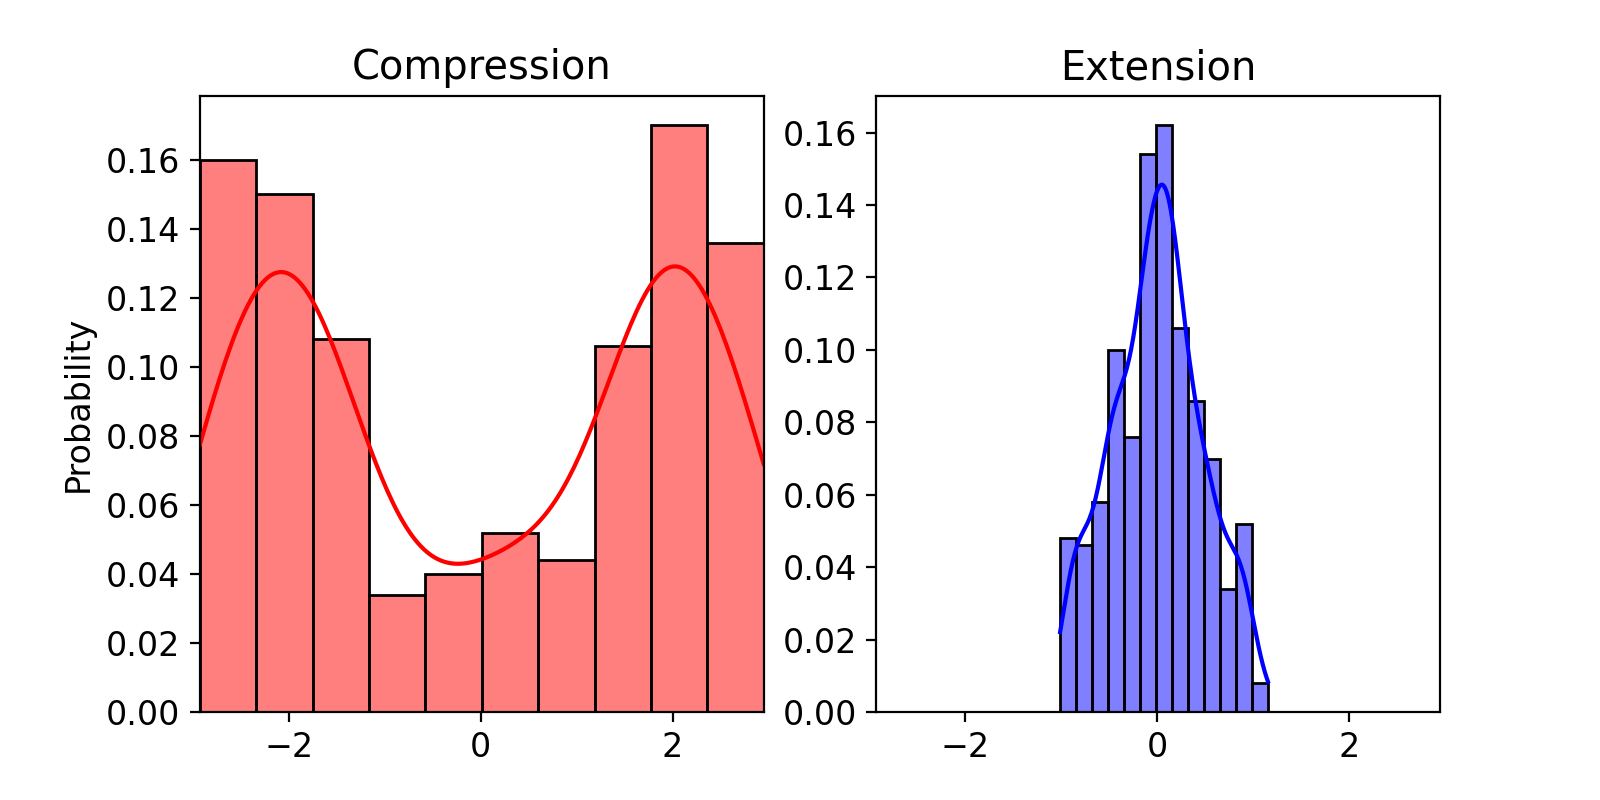

In [127]:
# Plot the tip reorientation angles during compression and extension

min_angle = min(np.min(tip_angle_reorientation_comp), np.min(tip_angle_reorientation_ext))
max_angle = max(np.max(tip_angle_reorientation_comp), np.max(tip_angle_reorientation_ext))

title = 'Tip angle reorientation distribution'

fig, [ax0, ax1] = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

sns.histplot(tip_angle_reorientation_comp, ax = ax0, kde=True, color = 'r', fill = True, stat="probability")
ax0.set_title('Compression')
ax0.set_xlim([min_angle, max_angle])

sns.histplot(tip_angle_reorientation_ext, ax = ax1, kde=True, color = 'b', fill = True, stat="probability")
ax1.set_title('Extension')
ax1.set_ylabel('')
ax1.set_xlim([min_angle, max_angle])

file_name = filament.dataName[:-5] +'_'+title 

file_path = filament.analysisFolder

if(not os.path.exists(file_path)):
    os.makedirs(file_path)

plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')


plt.show()

### Distribution of Base-tip reorientation angles

<IPython.core.display.Javascript object>


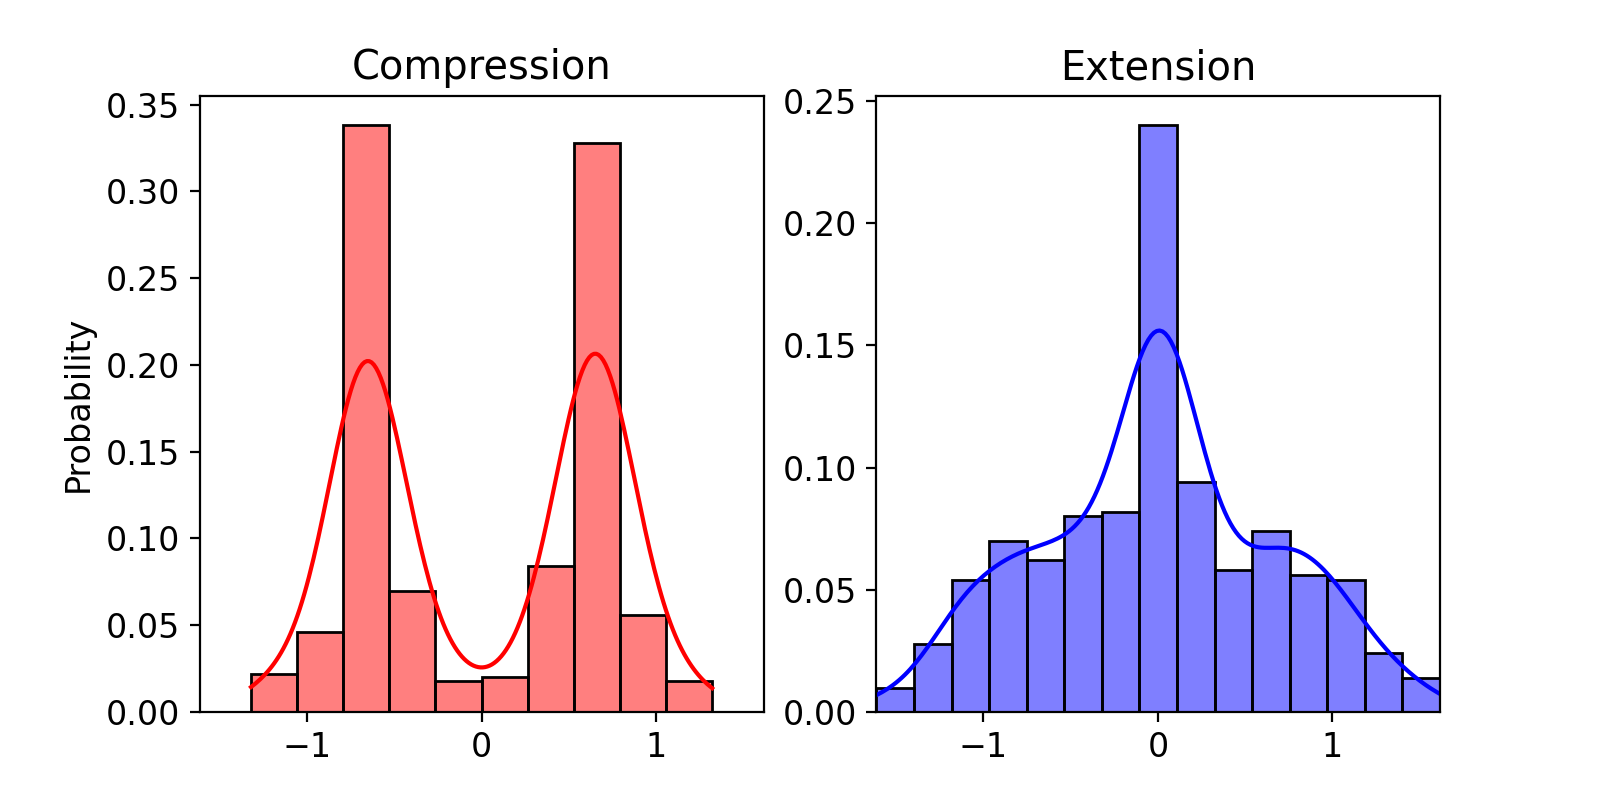

In [128]:
# Plot the Base-tip reorientation angles during compression and extension

min_angle = min(np.min(base_tip_angle_reorientation_comp), np.min(base_tip_angle_reorientation_ext))
max_angle = max(np.max(base_tip_angle_reorientation_comp), np.max(base_tip_angle_reorientation_ext))

title = 'Base-Tip angle reorientation distribution'

fig, [ax0, ax1] = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

sns.histplot(base_tip_angle_reorientation_comp, ax = ax0, kde=True, color = 'r', fill = True, stat="probability")
ax0.set_title('Compression')
ax0.set_xlim([min_angle, max_angle])

sns.histplot(base_tip_angle_reorientation_ext, ax = ax1, kde=True, color = 'b', fill = True, stat="probability")
ax1.set_title('Extension')
ax1.set_ylabel('')
ax1.set_xlim([min_angle, max_angle])

file_name = filament.dataName[:-5] +'_'+title 

file_path = filament.analysisFolder

if(not os.path.exists(file_path)):
    os.makedirs(file_path)

plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')


plt.show()

## Orientation decorrelation function
Calculates the orientation decorrelation function during compressive and extensional phases

In [55]:
# Use the tip tangent angles to calculate the tip orientation decorrelation function
import pandas as pd

tip_decorrelation_comp = np.empty_like(tip_angles_compression)
tip_decorrelation_ext = np.empty_like(tip_angles_extension)

base_tip_decorrelation_comp = np.empty_like(base_tip_angles_compression)
base_tip_decorrelation_ext = np.empty_like(base_tip_angles_extension)

df_orient_decorr = pd.DataFrame({'Time':[], 'Activty cycle':[], 'Phase':[], 'Decorrelation (tip)':[], 'Decorrelation (base tip)':[]})

for ii in range(filament.activity_cycles):
    
    # Tip angle decorrelation
    tip_decorrelation_comp[ii, :] = np.cos(tip_angles_compression[ii,:])*np.cos(tip_angles_compression[ii, 0]) + np.sin(tip_angles_compression[ii, :])*np.sin(tip_angles_compression[ii, 0])
    tip_decorrelation_ext[ii, :] = np.cos(tip_angles_extension[ii,:])*np.cos(tip_angles_extension[ii, 0]) + np.sin(tip_angles_extension[ii, :])*np.sin(tip_angles_extension[ii, 0])
    
    # Base-tip decorrelation
    base_tip_decorrelation_comp[ii, :] = np.cos(base_tip_angles_compression[ii,:])*np.cos(base_tip_angles_compression[ii, 0]) + np.sin(base_tip_angles_compression[ii, :])*np.sin(base_tip_angles_compression[ii, 0])
    base_tip_decorrelation_ext[ii, :] = np.cos(base_tip_angles_extension[ii,:])*np.cos(base_tip_angles_extension[ii, 0]) + np.sin(base_tip_angles_extension[ii, :])*np.sin(base_tip_angles_extension[ii, 0])
    
    df_orient_decorr = df_orient_decorr.append(pd.DataFrame({'Time':time_array_comp, 'Activity cycle':np.repeat(ii, len(time_array_comp), axis = 0), 'Phase':np.repeat('compression', len(time_array_comp), axis = 0), 'Decorrelation (tip)':tip_decorrelation_comp[ii, :]}))
    
    df_orient_decorr = df_orient_decorr.append(pd.DataFrame({'Time':time_array_ext, 'Activity cycle':np.repeat(ii, len(time_array_ext), axis = 0), 'Phase':np.repeat('extension', len(time_array_ext), axis = 0), 'Decorrelation (tip)':tip_decorrelation_ext[ii, :]}))
    
    df_orient_decorr = df_orient_decorr.append(pd.DataFrame({'Time':time_array_comp, 'Activity cycle':np.repeat(ii, len(time_array_comp), axis = 0), 'Phase':np.repeat('compression', len(time_array_comp), axis = 0), 'Decorrelation (base tip)':base_tip_decorrelation_comp[ii, :]}))
    
    df_orient_decorr = df_orient_decorr.append(pd.DataFrame({'Time':time_array_ext, 'Activity cycle':np.repeat(ii, len(time_array_ext), axis = 0), 'Phase':np.repeat('extension', len(time_array_ext), axis = 0), 'Decorrelation (base tip)':base_tip_decorrelation_ext[ii, :]}))
    
    



In [56]:
# Save the orientation decorrelation data to file
# Create a data folder and save the processed data
root_folder = '../../processed_data/'


proc_data_folder = root_folder + 'OrientationDecorrelation' + '/' + filament.dataFolder

if not os.path.exists(proc_data_folder):
    os.makedirs(proc_data_folder)
    



df_orient_decorr.to_csv(os.path.join(proc_data_folder, filament.dataName+'_'+'OrientationDecorrelation.csv'))

filament.df_metadata.to_csv(os.path.join(proc_data_folder, 'metadata.csv'))


### Tip Orientation decorrelation

<IPython.core.display.Javascript object>


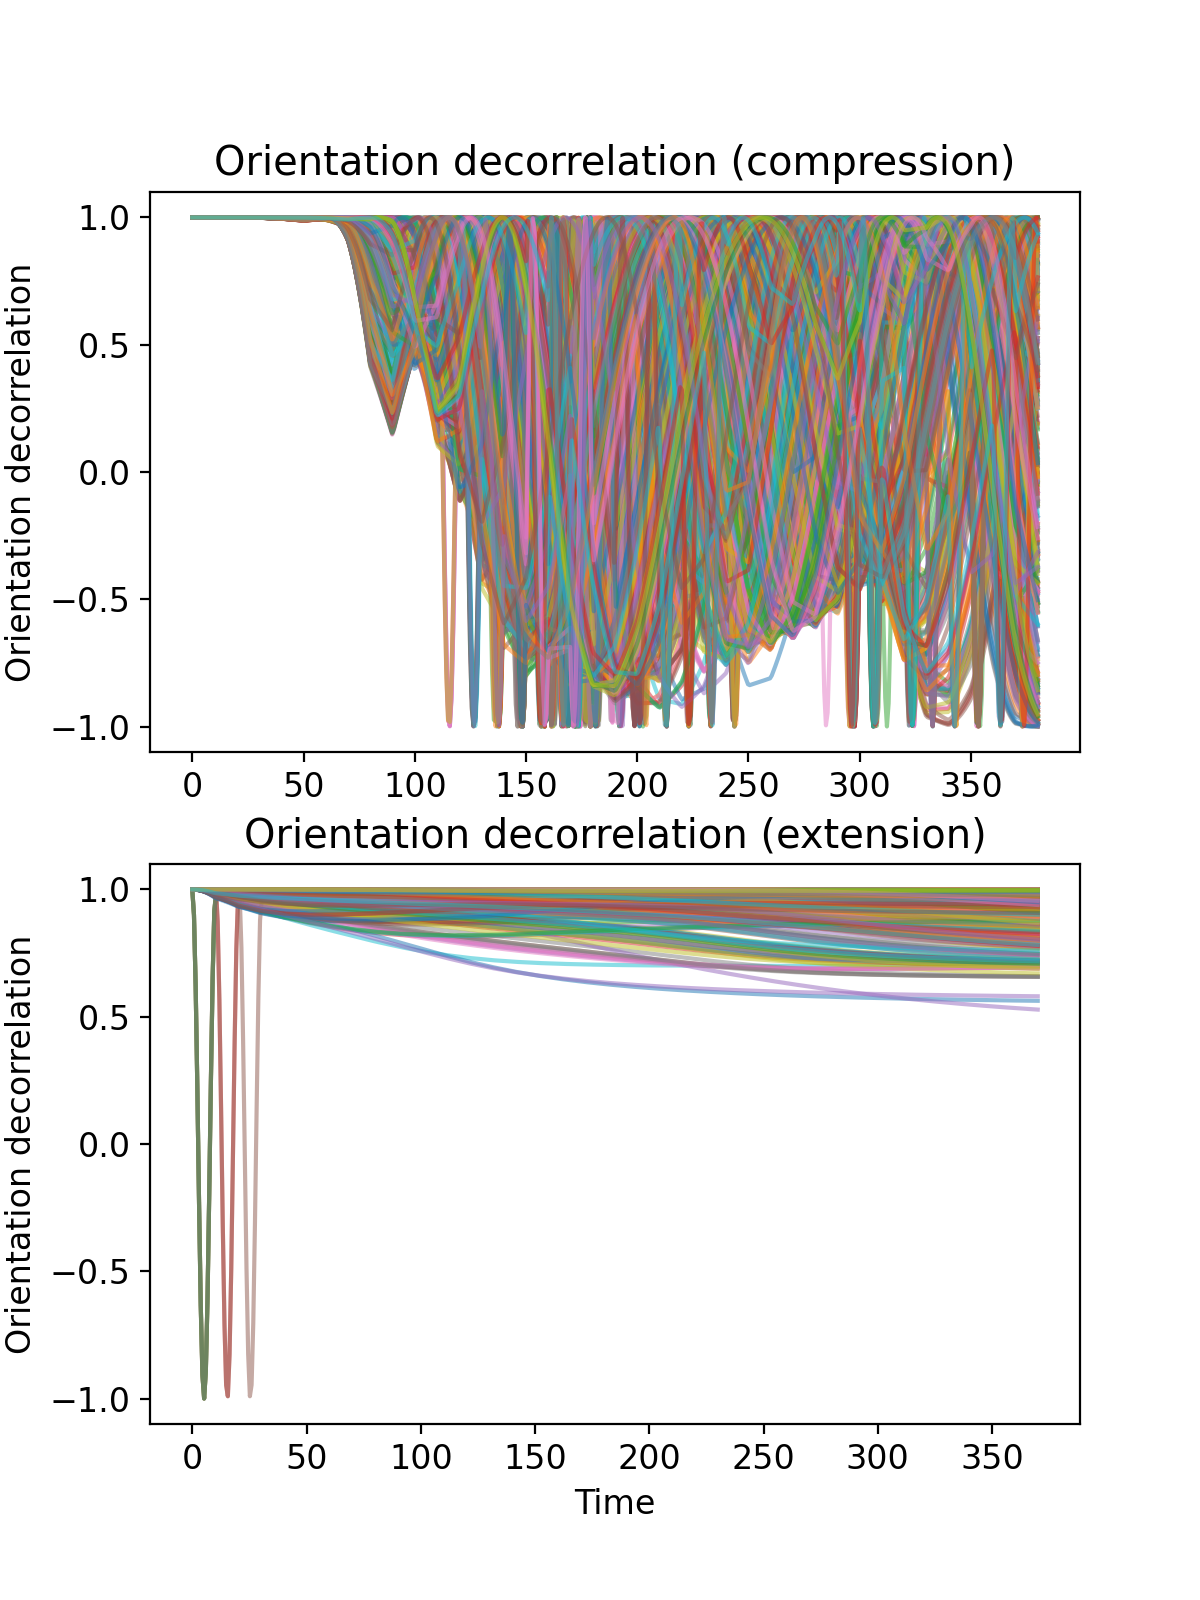

In [45]:
## Plot the Tip orientation decorrelation for the whole simulation

title = 'Orientation decorrelation function (tip angle)'

fig, [ax0, ax1] = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8))
for ii in range(filament.activity_cycles):
    
    ax0.plot(time_array_comp, tip_decorrelation_comp[ii, :], alpha = 0.5)
    ax1.plot(time_array_ext, tip_decorrelation_ext[ii, :], alpha = 0.5)
    
ax0.set_ylabel('Orientation decorrelation')
ax1.set_ylabel('Orientation decorrelation')
ax1.set_xlabel('Time')

ax0.set_title('Orientation decorrelation (compression)')
ax1.set_title('Orientation decorrelation (extension)')

file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)
    
# file_name = filament.dataName[:-5] +'_'+title
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

<IPython.core.display.Javascript object>


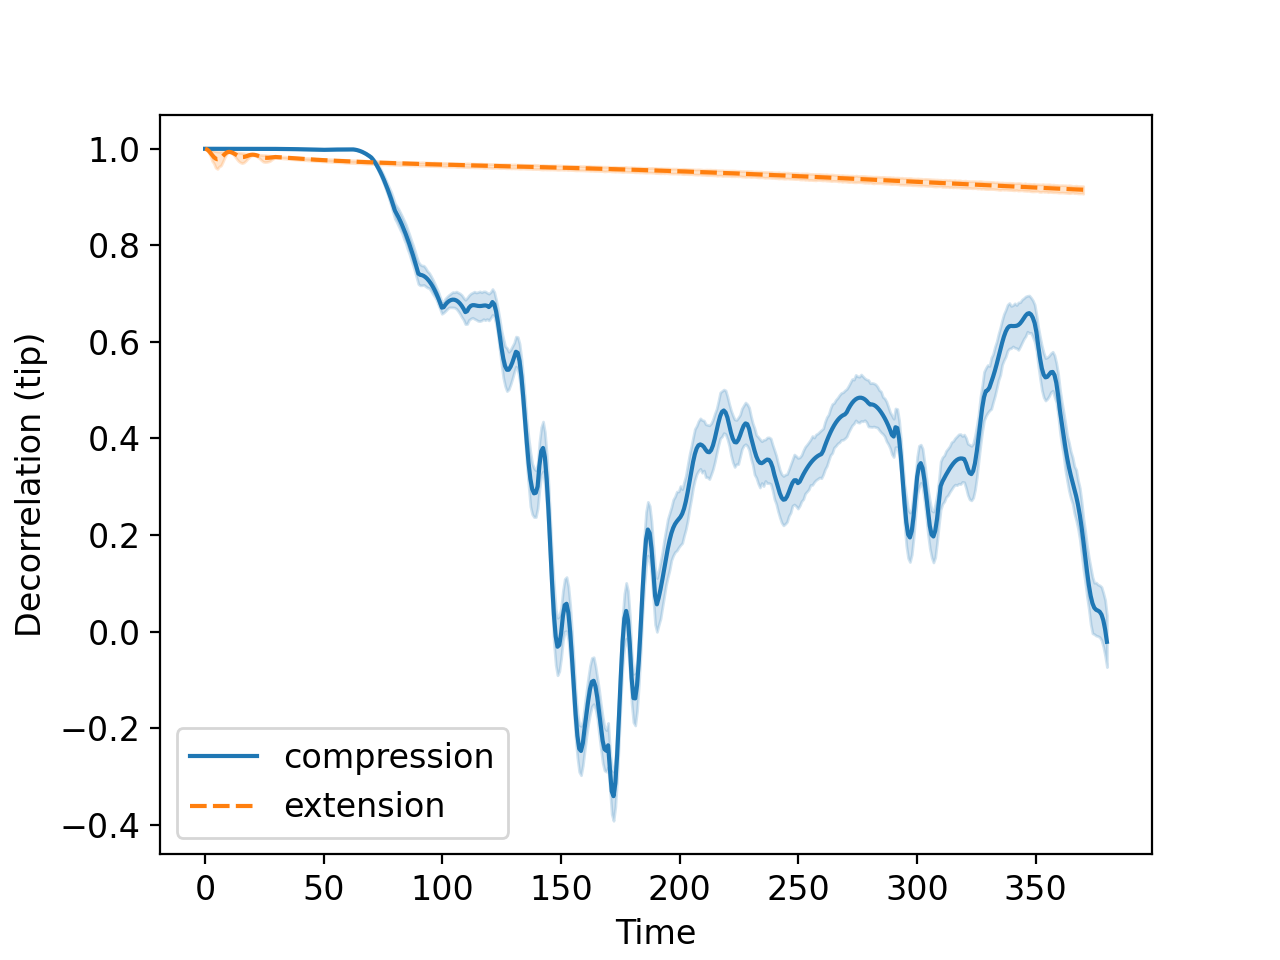

In [46]:
## Average orientation decorrelation (Tip angle)

plt.figure()

title = 'Tip Orientation decorrelation function (mean)'
sns.lineplot(x = 'Time', y = 'Decorrelation (tip)', data = df_orient_decorr, style = 'Phase', hue = 'Phase', ci = 95)

plt.legend()

file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)
    
file_name = filament.dataName[:-5] +'_'+title
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()



### Base-Tip Orientation decorrelation

<IPython.core.display.Javascript object>


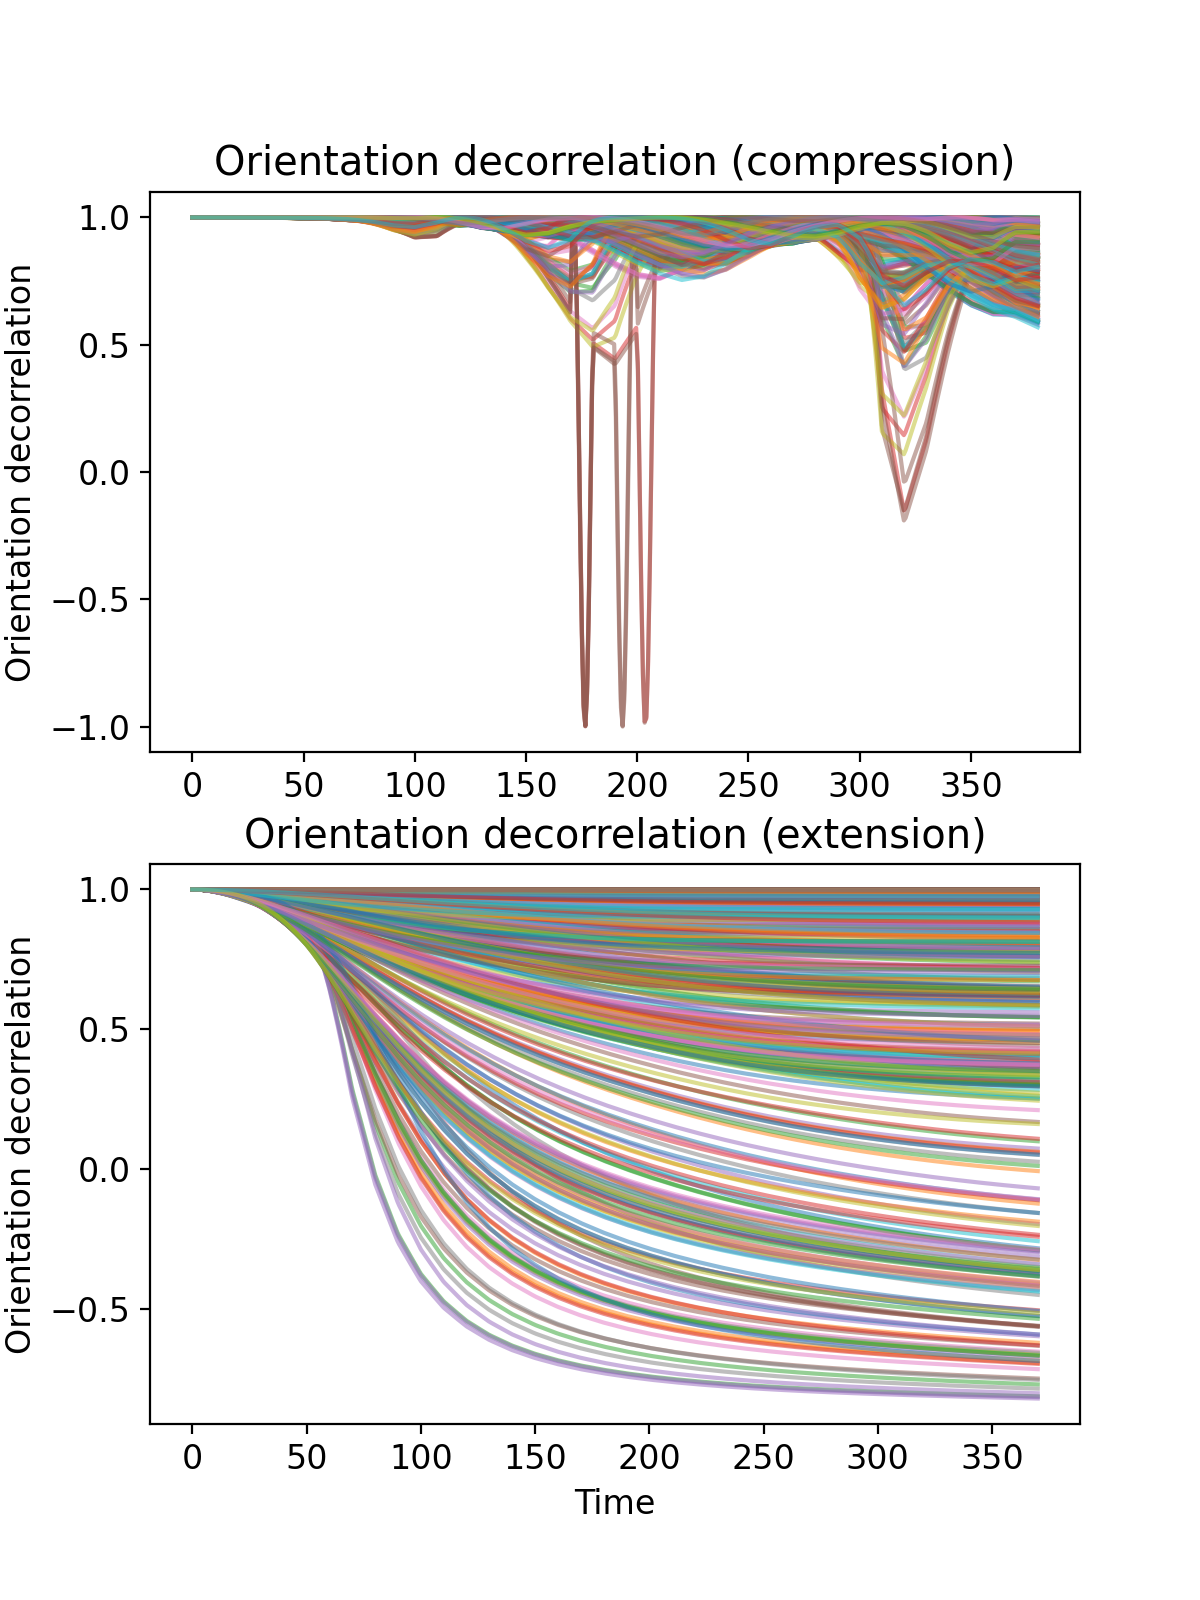

In [47]:
## Plot the Base-Tip orientation decorrelation for the whole simulation

title = 'Orientation decorrelation function (base tip angle)'

fig, [ax0, ax1] = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8))
for ii in range(filament.activity_cycles):
    
    ax0.plot(time_array_comp, base_tip_decorrelation_comp[ii, :], alpha = 0.5)
    ax1.plot(time_array_ext, base_tip_decorrelation_ext[ii, :], alpha = 0.5)
    
ax0.set_ylabel('Orientation decorrelation')
ax1.set_ylabel('Orientation decorrelation')
ax1.set_xlabel('Time')

ax0.set_title('Orientation decorrelation (compression)')
ax1.set_title('Orientation decorrelation (extension)')

file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)
    
# file_name = filament.dataName[:-5] +'_'+title
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

<IPython.core.display.Javascript object>


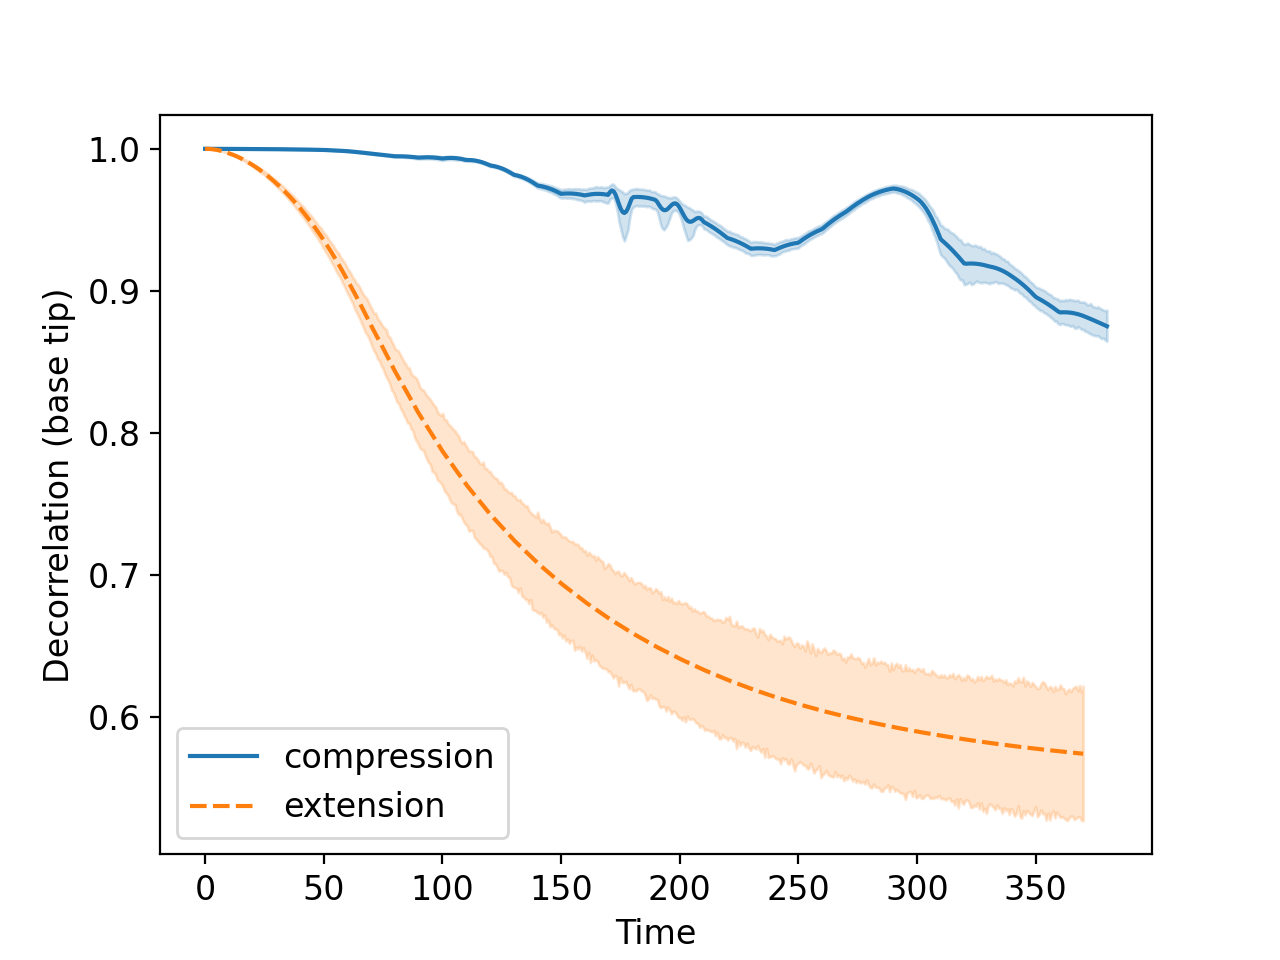

In [48]:
## Average orientation decorrelation (Base-Tip angle)

plt.figure()

title = 'Base Tip Orientation decorrelation function (mean)'
sns.lineplot(x = 'Time', y = 'Decorrelation (base tip)', data = df_orient_decorr, style = 'Phase', hue = 'Phase', ci = 95)

plt.legend()

file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)
    
file_name = filament.dataName[:-5] +'_'+title
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Return map of Filament tip angle ($\theta_{n+1}$ vs $\theta_n$)


In [72]:
tip_angle_phase_0 = filament.derived_data['tip angle'][constant_phase_compression]

time_array = filament.Time[constant_phase_compression]
activity_cycle = np.array(time_array/filament.activity_timescale, dtype = int)

start_cycle = 100

<IPython.core.display.Javascript object>


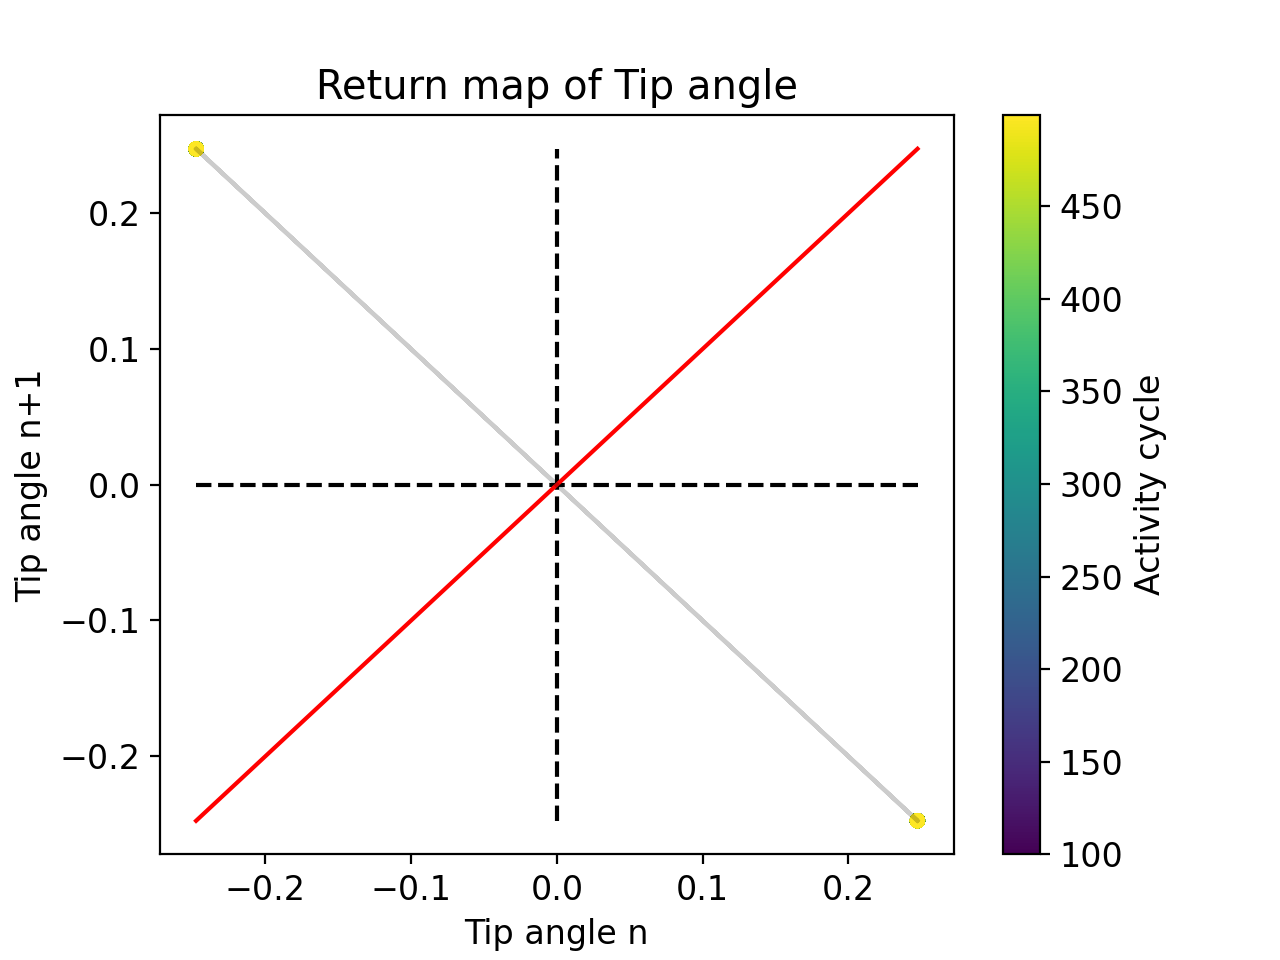

In [73]:
plt.figure()
title = 'Tip angle'

angle_min = np.min(tip_angle_phase_0)
angle_max = np.max(tip_angle_phase_0)

diag_line_x = np.linspace(angle_min, angle_max, 20)
diag_line_y = diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'r-')
ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--')
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--')

ax2 = plt.plot(tip_angle_phase_0[start_cycle:-1], tip_angle_phase_0[start_cycle+1:], color = 'k', alpha =0.2)

ax1 = plt.scatter(tip_angle_phase_0[start_cycle:-1], tip_angle_phase_0[start_cycle+1:], 20, c = activity_cycle[start_cycle:-1])




plt.xlabel('Tip angle '+'n')
plt.ylabel('Tip angle '+'n+1')
plt.title('Return map of '+ title)
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')


# file_path = filament.analysis_folder
# if(not os.path.exists(file_path)):
#     os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Return Map of Filament Base Tip Angle

In [74]:
filament.compute_base_tip_angle()

base_tip_angle_phase_0 = filament.derived_data['base tip angle'][constant_phase_compression]

<IPython.core.display.Javascript object>


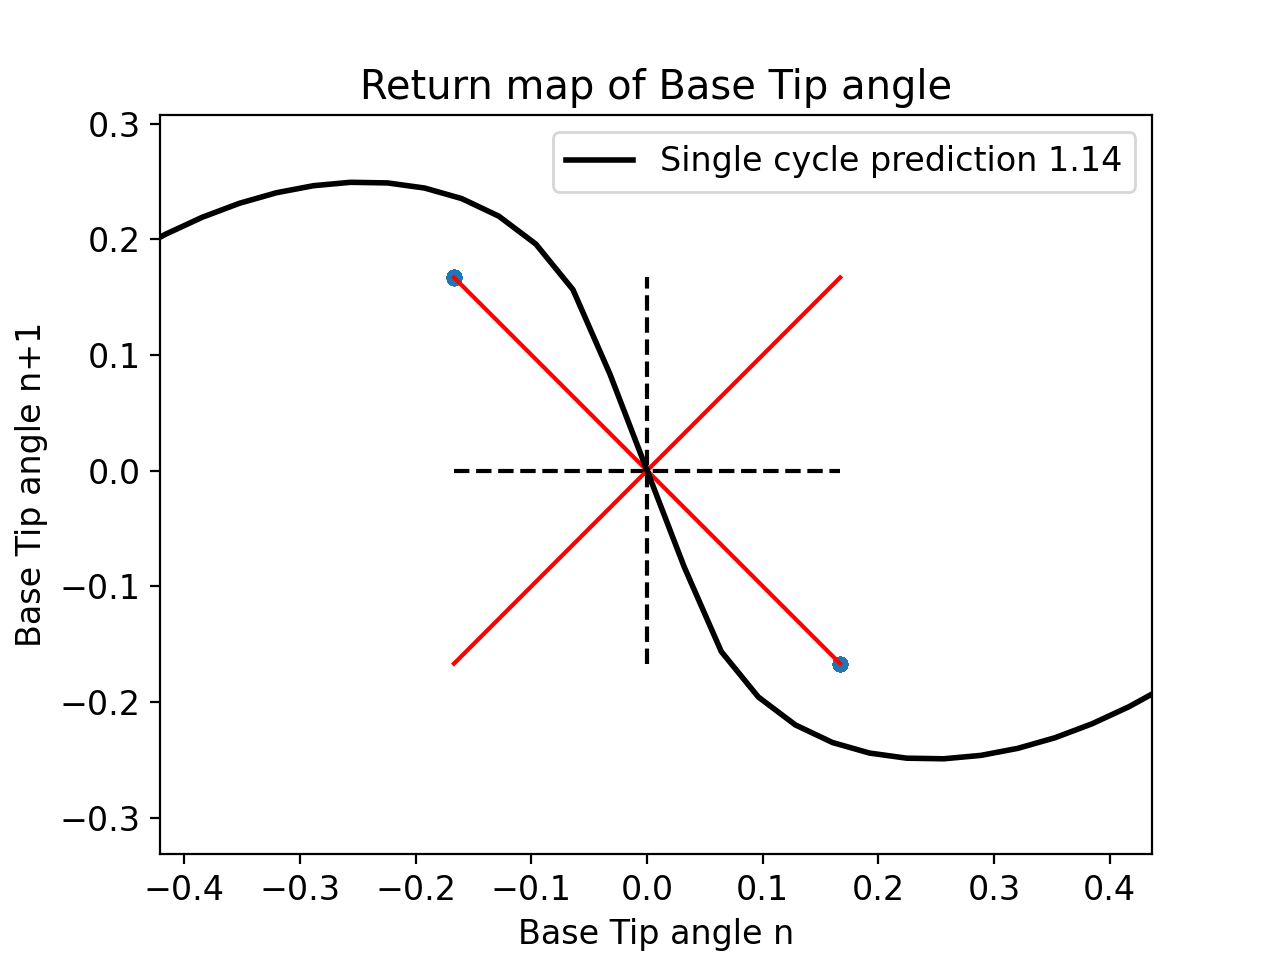

In [76]:
# Load the single-cycle prediction if available
import pandas as pd

# single_cycle_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_k_25/buckling_escape_angles_750_1.52564102564103.csv'
# single_cycle_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2021-12-15/buckling_escape_angles_750_1.52564102564103.csv'
# single_cycle_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_2.736842105263158.csv'
# single_cycle_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.07692307692308.csv'

single_cycle_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.1410256410256399.csv'
df_single_cycle = None

if os.path.exists(single_cycle_file):
    df_single_cycle = pd.read_csv(single_cycle_file)
    df_single_cycle['-Initial angle (rad)'] = -df_single_cycle['Initial angle (rad)']
    df_single_cycle['-Final angle (rad)'] = -df_single_cycle['Final angle (rad)']
    



plt.figure()
title = 'Base Tip angle'

angle_min = np.min(base_tip_angle_phase_0)
angle_max = np.max(base_tip_angle_phase_0)

diag_line_x = np.linspace(angle_min, angle_max, 20)
diag_line_y = diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'r-')
ax2 = plt.plot(diag_line_x, -diag_line_y, 'r-')
ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--')
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--')

# ax1 = plt.scatter(base_tip_angle_phase_0[start_cycle:-1], base_tip_angle_phase_0[start_cycle+1:], 20, c = activity_cycle[start_cycle:-1])
ax1 = plt.scatter(base_tip_angle_phase_0[start_cycle:-1], base_tip_angle_phase_0[start_cycle+1:], 20)

# ax2 = plt.plot(base_tip_angle_phase_0[start_cycle:-1], base_tip_angle_phase_0[start_cycle+1:], color = 'k', alpha =0.2)




plt.xlabel('Base Tip angle '+'n')
plt.ylabel('Base Tip angle '+'n+1')
plt.title('Return map of '+ title)
# cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')


file_path = filament.analysisFolder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

plt.axis('equal')
file_name = filament.dataName[:-5] +'_'+title
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

# If Single-cycle data exists plot it
if(df_single_cycle is not None):
    ax3 = sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)',  
             data = df_single_cycle, color = 'k', linewidth = 2, label = 'Single cycle prediction {}'.format(df_single_cycle['d0'][0]))
    ax4 = sns.lineplot(x='-Initial angle (rad)', y = '-Final angle (rad)',  
             data = df_single_cycle, color = 'k', linewidth = 2)

# plt.xlim(-angle_max, angle_max)
# plt.ylim(-angle_max, angle_max)
file_name = filament.dataName[:-5] +'_'+title+'SingleCyclePrediction'
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')
plt.show()

### Change in Base Tip angle

<IPython.core.display.Javascript object>


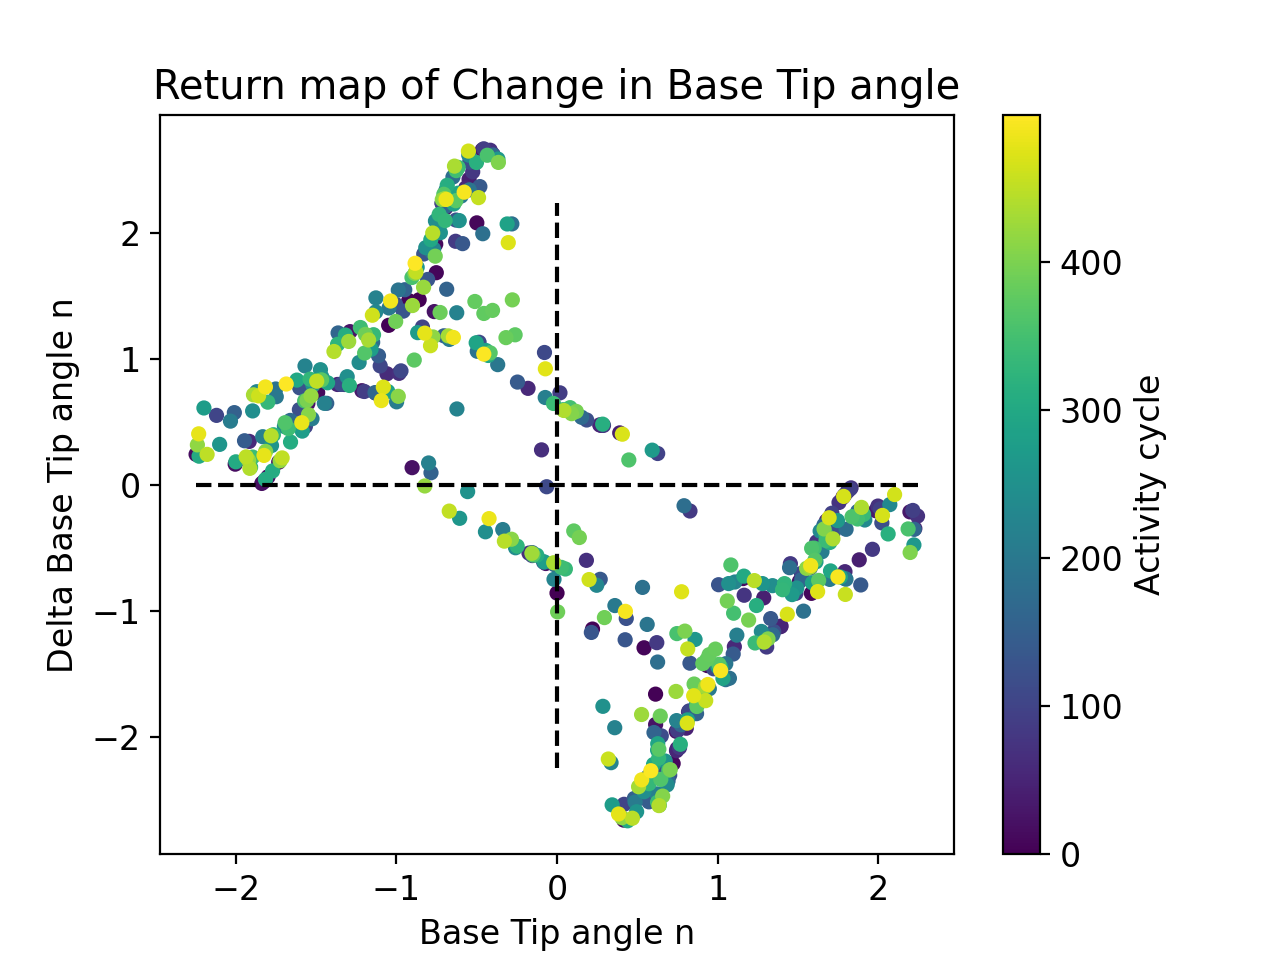

In [194]:
plt.figure()
start_cycle=0
title = 'Change in Base Tip angle'

angle_min = np.min(base_tip_angle_phase_0)
angle_max = np.max(base_tip_angle_phase_0)

# diag_line_x = np.linspace(angle_min, angle_max, 20)
# diag_line_y = diag_line_x

# ax2 = plt.plot(diag_line_x, diag_line_y, 'r-')
# ax2 = plt.plot(diag_line_x, -diag_line_y, 'r-')
ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--')
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--')

ax1 = plt.scatter(base_tip_angle_phase_0[start_cycle:-1], base_tip_angle_phase_0[start_cycle+1:] - base_tip_angle_phase_0[start_cycle:-1], 20, c = activity_cycle[start_cycle:-1])

# ax2 = plt.plot(base_tip_angle_phase_0[:-1], base_tip_angle_phase_0[1:], color = 'k', alpha =0.2)



plt.xlabel('Base Tip angle '+'n')
plt.ylabel('Delta Base Tip angle '+'n')
plt.title('Return map of '+ title)
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')

file_path = filament.analysisFolder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')

## Tangent angle dynamics over whole simulation

<IPython.core.display.Javascript object>


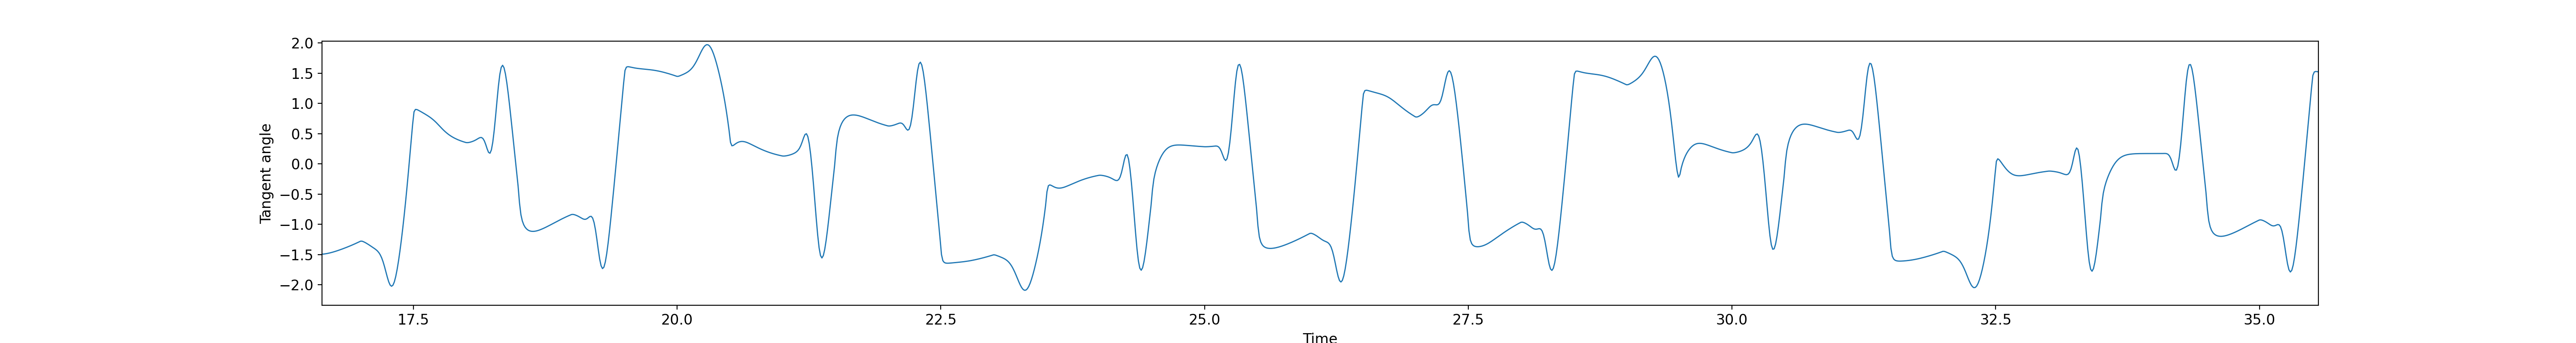

In [330]:
time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.Time/filament.activity_timescale, filament.derived_data['tip angle'], linewidth = 1)
# plt.vlines(filament.Time[constant_phase_compression]/filament.activity_timescale, min(filament.derived_data['tip angle']), max(filament.derived_data['tip angle']), 'r', alpha = 0.5)
# plt.vlines(filament.Time[constant_phase_extension]/filament.activity_timescale, min(filament.derived_data['tip angle']), max(filament.derived_data['tip angle']), 'g', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('Tangent angle')
ax = plt.gca()
# ax.set_aspect(1)
# plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


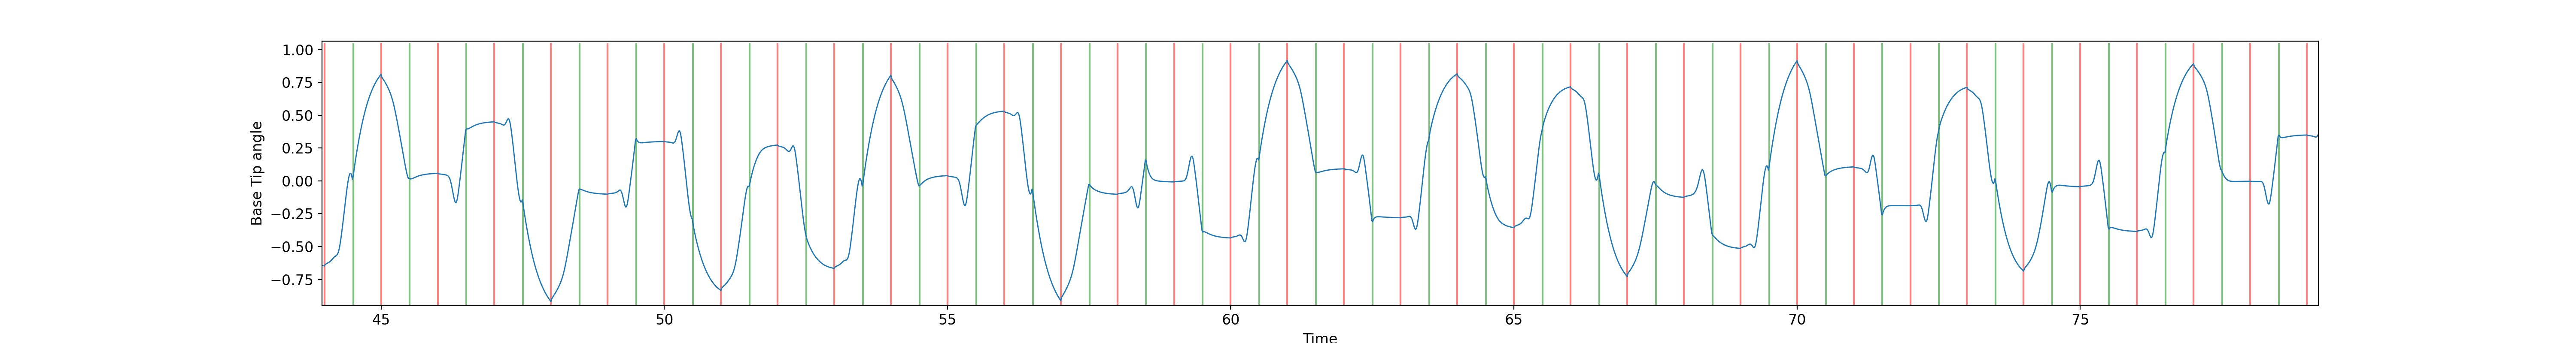

In [331]:
## Base-tip angle over whole simulation

time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.Time/filament.activity_timescale, filament.derived_data['base tip angle'], linewidth = 1)
plt.vlines(filament.Time[constant_phase_compression]/filament.activity_timescale, min(filament.derived_data['base tip angle']), max(filament.derived_data['base tip angle']), 'r', alpha = 0.5)
plt.vlines(filament.Time[constant_phase_extension]/filament.activity_timescale, min(filament.derived_data['base tip angle']), max(filament.derived_data['base tip angle']), 'g', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('Base Tip angle')
ax = plt.gca()
# ax.set_aspect(1)
# plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

In [307]:
# Find the local maxima and minima of the Tip angles time series
min_peak = min(filament.derived_data['tip angle'])
max_peak = max(filament.derived_data['tip angle'])
max_peaks, props = signal.find_peaks(filament.derived_data['tip angle'], (0.2*max_peak, max_peak))

min_peaks, props = signal.find_peaks(-filament.derived_data['tip angle'], (-0.2*min_peak, -min_peak))

print(max_peaks)
print(min_peaks)

[  412   485   862   937  1160  1387  1459  1613  1684  1836  1912  1988
  2062  2213  2285  2510  2738  2809  2961  3037  3112  3187  3263  3336
  3560  3784  4387  4461  4684  5063  5134  5288  5359  5511  5588  5662
  5737  5812  5886  6188  6259  6411  6488  6562  6637  6713  6786  7010
  7234  7836  8059  8213  8284  8437  8511  8736  9038  9109  9262  9335
  9786  9862  9938 10012 10088 10162 10238 10311 10540 10609 10763 10833
 10985 11209 11888 11959 12113 12184 12336 12412 12487 12562 12637 12712
 12863 12934 13087 13159 13312 13385 13763 13835 14062 14135 14363 14434
 14587 14662 14884 15113 15184 15337 15412 15635 15861 16463 16535 17063
 17137 17212 17287 17362 17438 17512 17587 17662 17738 17811 18035 18259
 18639 18711 18934 19463 19534 19688 19759 19911 19988 20062 20137 20212
 20287 20439 20509 20663 20733 20885 21109 21562 21635 22014 22085 22311
 22388 22462 22537 23362 23437 23659 23887 23963 24037 24112 24337 24412
 24637 24709 24862 24935 25538 25609 25763 25834 25

<IPython.core.display.Javascript object>


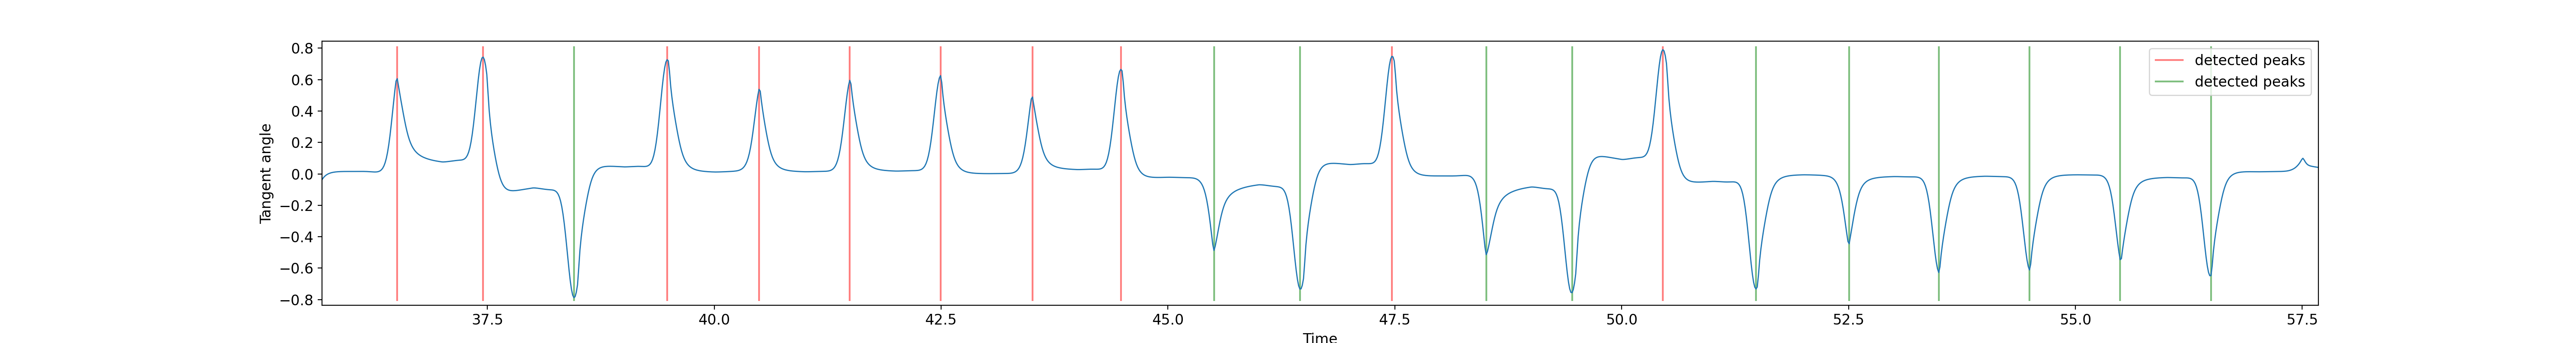

In [308]:
plt.figure(figsize = (30,4))
plt.plot(filament.Time/filament.activity_timescale, filament.derived_data['tip angle'], linewidth = 1)
plt.vlines(filament.Time[max_peaks]/filament.activity_timescale, min(filament.derived_data['tip angle']), max(filament.derived_data['tip angle']), 'r', alpha = 0.5, label = 'detected peaks')
plt.vlines(filament.Time[min_peaks]/filament.activity_timescale, min(filament.derived_data['tip angle']), max(filament.derived_data['tip angle']), 'g', alpha = 0.5, label = 'detected peaks')

plt.xlabel('Time')
plt.ylabel('Tangent angle')
plt.legend()
ax = plt.gca()
# ax.set_aspect(1)
# plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


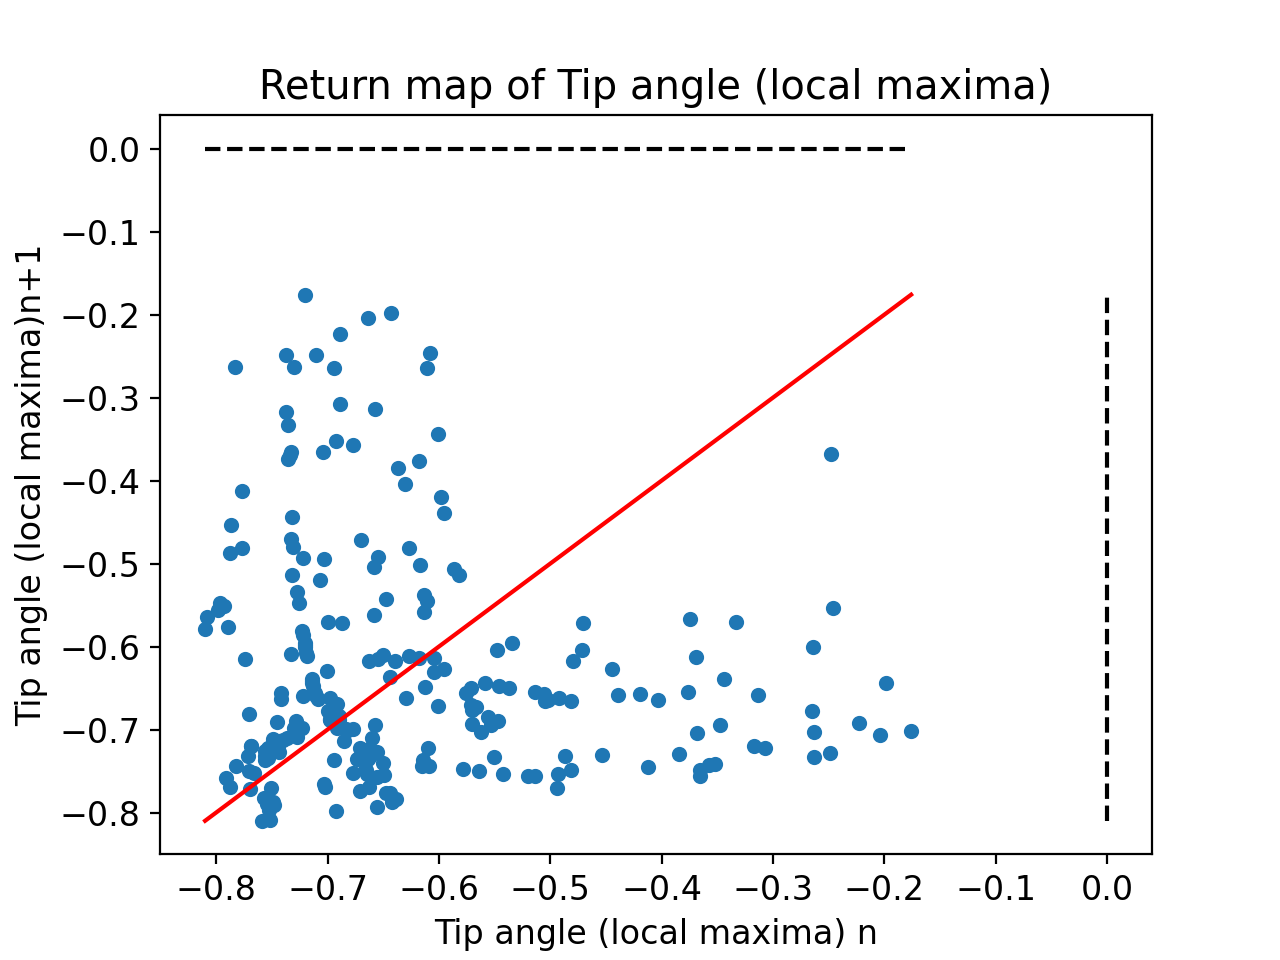

In [313]:
## Return map of the maxima of the tip angles

plt.figure()
title = 'Tip angle (local maxima)'

all_peaks = np.sort(np.concatenate((min_peaks, max_peaks)))

# tip_angle_maxima = filament.derived_data['tip angle'][all_peaks]

tip_angle_maxima = filament.derived_data['tip angle'][min_peaks]
# tip_angle_maxima = tip_angle_maxima[-100:]

angle_min = np.min(tip_angle_maxima)
angle_max = np.max(tip_angle_maxima)

diag_line_x = np.linspace(angle_min, angle_max, 20)
diag_line_y = diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'r-')
ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--')
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--')

ax1 = plt.scatter(tip_angle_maxima[:-1], tip_angle_maxima[1:], 20)




plt.xlabel('Tip angle (local maxima) '+'n')
plt.ylabel('Tip angle (local maxima)'+'n+1')
plt.title('Return map of '+ title)
# cbar = plt.colorbar(ax1)
# cbar.ax.set_ylabel('Activity cycle')


file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

In [260]:
len(all_peaks)

479

In [257]:
max_peaks

array([  412,   485,   862,   937,  1160,  1387,  1459,  1613,  1684,
        1836,  1912,  1988,  2062,  2213,  2285,  2510,  2738,  2809,
        2961,  3037,  3112,  3187,  3263,  3336,  3560,  3784,  4387,
        4461,  4684,  5063,  5134,  5288,  5359,  5511,  5588,  5662,
        5737,  5812,  5886,  6188,  6259,  6411,  6488,  6562,  6637,
        6713,  6786,  7010,  7234,  7836,  8059,  8213,  8284,  8437,
        8511,  8736,  9038,  9109,  9262,  9335,  9786,  9862,  9938,
       10012, 10088, 10162, 10238, 10311, 10540, 10609, 10763, 10833,
       10985, 11209, 11888, 11959, 12113, 12184, 12336, 12412, 12487,
       12562, 12637, 12712, 12863, 12934, 13087, 13159, 13312, 13385,
       13763, 13835, 14062, 14135, 14363, 14434, 14587, 14662, 14884,
       15113, 15184, 15337, 15412, 15635, 15861, 16463, 16535, 17063,
       17137, 17212, 17287, 17362, 17438, 17512, 17587, 17662, 17738,
       17811, 18035, 18259, 18639, 18711, 18934, 19463, 19534, 19688,
       19759, 19911,